**EXPLORATORY DATA ANALYSIS (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data = pd.read_csv('titanic.csv')

# Display the first few rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Step 3: Understand the Data

In [4]:
# Shape of the dataset
print("Dataset Shape:", data.shape)

# Summary of the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std 

# Step 4: Univariate Analysis
1. *Visualize distributions using histograms*

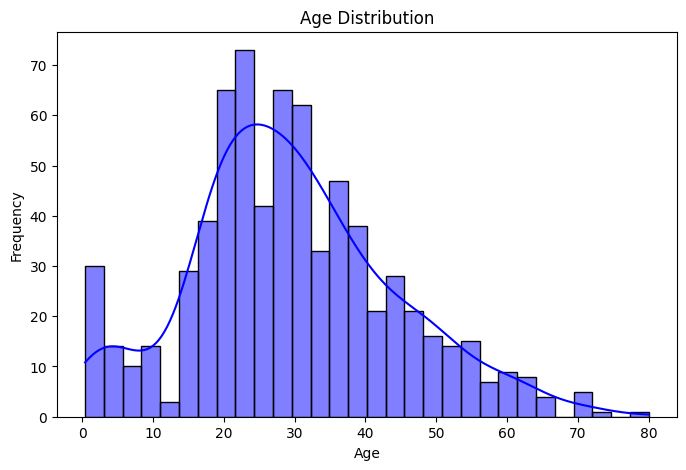

In [5]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2. *Analyze categorical variables*

<ipython-input-6-e1f31b7fbc0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', palette='Set2')


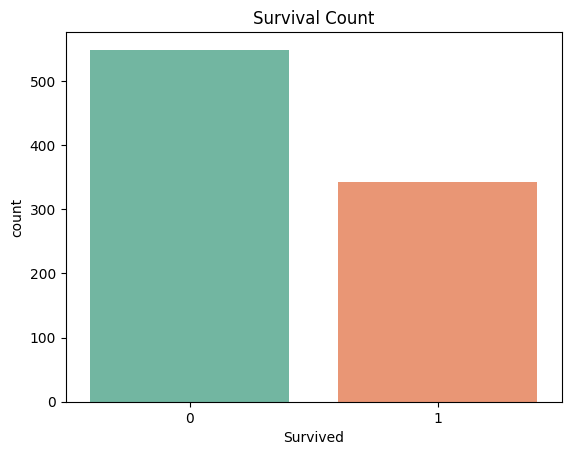

In [6]:
# Count plot for Survival
sns.countplot(data=data, x='Survived', palette='Set2')
plt.title('Survival Count')
plt.show()

# Step 5: Multivariate Analysis
1.* Correlation Heatmap*

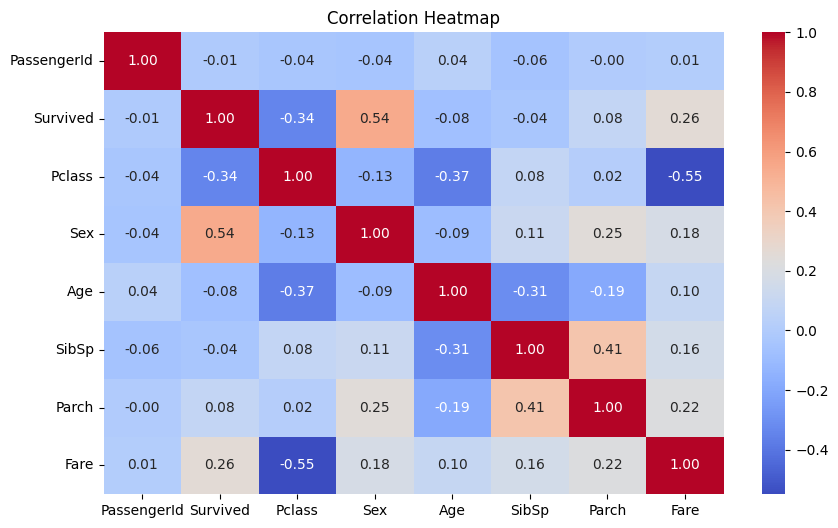

In [9]:
# Convert 'Sex' to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Now, recompute the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

*2. Scatter Plot*

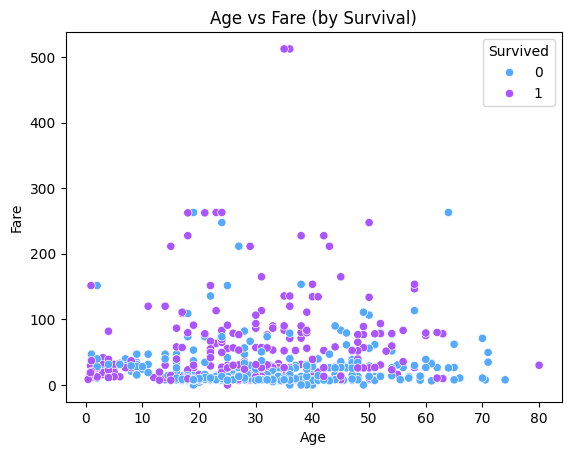

In [10]:
# Scatter plot of Age vs Fare
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='cool')
plt.title('Age vs Fare (by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Step 6: Outlier Detection
1. Boxplot
python
Copy code


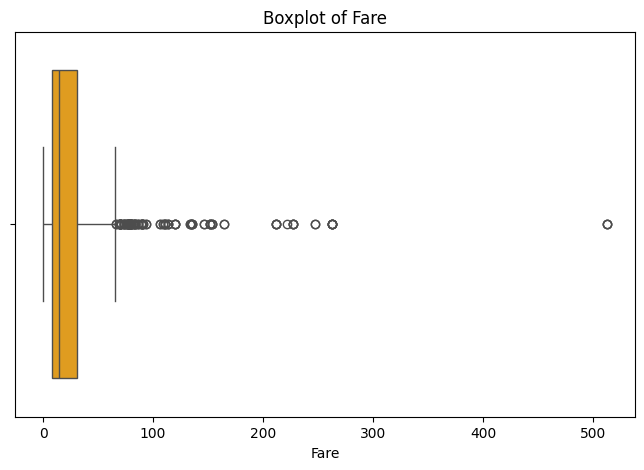

In [11]:
# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Fare', color='orange')
plt.title('Boxplot of Fare')
plt.show()

# Step 7: Categorical Relationships
1. Bar Plot
python
Copy code


<ipython-input-12-2bd4958bcdd3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Pclass', y='Survived', palette='muted')


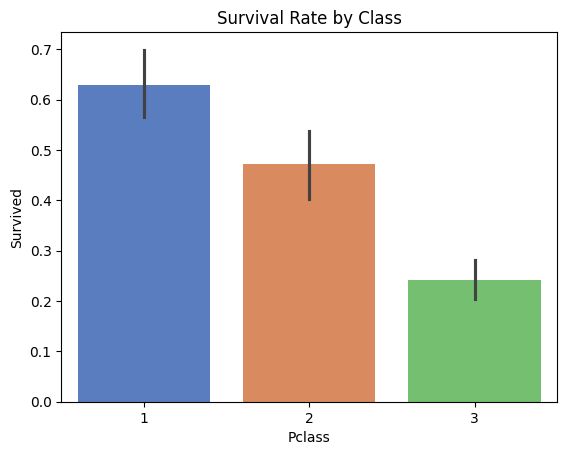

In [12]:
# Survival rate by Class
sns.barplot(data=data, x='Pclass', y='Survived', palette='muted')
plt.title('Survival Rate by Class')
plt.show()

# Step 8: Handle Missing Values

In [13]:
# Fill missing Age values with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop rows with missing Embarked values
data.dropna(subset=['Embarked'], inplace=True)

<ipython-input-13-59878cba7a10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


# Step 9: Summary of Insights
**Distribution Analysis**: Majority of passengers are between 20-40 years old.

**Survival Analysis**: Higher survival rate for females and first-class passengers.

**Correlation**: Strong correlation between Fare and Survival.

**Outliers**: Observed in Fare distribution.
